using Grid & Random Search

In [ ]:
# 1. Import Libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import randint

In [ ]:
# 2. Load Dataset
iris = load_iris()
X = iris.data
y = iris.target

In [ ]:
# 3. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4. Baseline Model
baseline_model = RandomForestClassifier(random_state=42)
baseline_model.fit(X_train, y_train)
baseline_preds = baseline_model.predict(X_test)

print("Baseline Accuracy:", accuracy_score(y_test, baseline_preds))
print("Classification Report:\n", classification_report(y_test, baseline_preds))

Baseline Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [ ]:
# 5. Grid Search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy'
)

grid_search.fit(X_train, y_train)
grid_best_model = grid_search.best_estimator_
grid_preds = grid_best_model.predict(X_test)

print("Grid Search Best Parameters:", grid_search.best_params_)
print("Grid Search Accuracy:", accuracy_score(y_test, grid_preds))

Grid Search Best Parameters: {'criterion': 'gini', 'max_depth': None, 'n_estimators': 100}
Grid Search Accuracy: 1.0


In [ ]:
# 6. Random Search
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(3, 30),
    'min_samples_split': randint(2, 10)
}

random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='accuracy',
    random_state=42
)

random_search.fit(X_train, y_train)
random_best_model = random_search.best_estimator_
random_preds = random_best_model.predict(X_test)

print("Random Search Best Parameters:", random_search.best_params_)
print("Random Search Accuracy:", accuracy_score(y_test, random_preds))

Random Search Best Parameters: {'max_depth': 9, 'min_samples_split': 5, 'n_estimators': 142}
Random Search Accuracy: 1.0


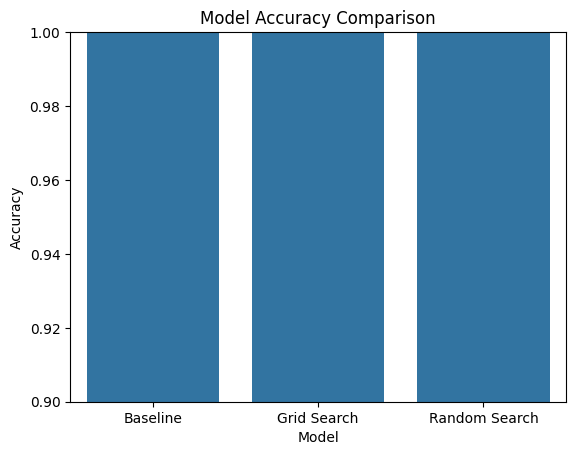

In [ ]:
# 7. Compare Results
results_df = pd.DataFrame({
    'Model': ['Baseline', 'Grid Search', 'Random Search'],
    'Accuracy': [
        accuracy_score(y_test, baseline_preds),
        accuracy_score(y_test, grid_preds),
        accuracy_score(y_test, random_preds)
    ]
})

sns.barplot(x='Model', y='Accuracy', data=results_df)
plt.title('Model Accuracy Comparison')
plt.ylim(0.9, 1.0)
plt.show()

Support Vector Machine (SVM) with Grid & Random Search

In [ ]:
from sklearn.svm import SVC
from scipy.stats import uniform

In [ ]:
# 1. Baseline SVM Model
baseline_svm = SVC()
baseline_svm.fit(X_train, y_train)
baseline_svm_preds = baseline_svm.predict(X_test)

print("SVM Baseline Accuracy:", accuracy_score(y_test, baseline_svm_preds))

SVM Baseline Accuracy: 1.0


In [ ]:
# 2. Grid Search for SVM
svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

svm_grid_search = GridSearchCV(SVC(), svm_param_grid, cv=5, scoring='accuracy')
svm_grid_search.fit(X_train, y_train)

svm_grid_best = svm_grid_search.best_estimator_
svm_grid_preds = svm_grid_best.predict(X_test)

print("SVM Grid Best Params:", svm_grid_search.best_params_)
print("SVM Grid Accuracy:", accuracy_score(y_test, svm_grid_preds))

SVM Grid Best Params: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
SVM Grid Accuracy: 1.0


In [ ]:
# 3. Random Search for SVM
svm_param_dist = {
    'C': uniform(0.1, 10),
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

svm_random_search = RandomizedSearchCV(SVC(), svm_param_dist, n_iter=20, cv=5, scoring='accuracy', random_state=42)
svm_random_search.fit(X_train, y_train)

svm_random_best = svm_random_search.best_estimator_
svm_random_preds = svm_random_best.predict(X_test)

print("SVM Random Best Params:", svm_random_search.best_params_)
print("SVM Random Accuracy:", accuracy_score(y_test, svm_random_preds))

SVM Random Best Params: {'C': np.float64(2.2233911067827616), 'gamma': 'auto', 'kernel': 'linear'}
SVM Random Accuracy: 1.0


XGBoost Classifier with Grid & Random Search

In [ ]:
from xgboost import XGBClassifier

In [ ]:
# 1. Baseline XGBoost Model
xgb_base = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_base.fit(X_train, y_train)
xgb_base_preds = xgb_base.predict(X_test)

print("XGBoost Baseline Accuracy:", accuracy_score(y_test, xgb_base_preds))

XGBoost Baseline Accuracy: 1.0


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:43:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
# 2. Grid Search for XGBoost
xgb_param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.3]
}

xgb_grid_search = GridSearchCV(
XGBClassifier(eval_metric='mlogloss', random_state=42),
    xgb_param_grid,
    cv=5,
    scoring='accuracy'
)
xgb_grid_search.fit(X_train, y_train)

xgb_grid_best = xgb_grid_search.best_estimator_
xgb_grid_preds = xgb_grid_best.predict(X_test)

print("XGBoost Grid Best Params:", xgb_grid_search.best_params_)
print("XGBoost Grid Accuracy:", accuracy_score(y_test, xgb_grid_preds))

XGBoost Grid Best Params: {'learning_rate': 0.3, 'max_depth': 6, 'n_estimators': 50}
XGBoost Grid Accuracy: 1.0


In [ ]:
# 3. Random Search for XGBoost
from scipy.stats import randint, uniform

xgb_param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.3)
}

xgb_random_search = RandomizedSearchCV(
   XGBClassifier(eval_metric='mlogloss', random_state=42),
    xgb_param_dist,
    n_iter=20,
    cv=5,
    scoring='accuracy',
    random_state=42
)
xgb_random_search.fit(X_train, y_train)

xgb_random_best = xgb_random_search.best_estimator_
xgb_random_preds = xgb_random_best.predict(X_test)

print("XGBoost Random Best Params:", xgb_random_search.best_params_)
print("XGBoost Random Accuracy:", accuracy_score(y_test, xgb_random_preds))


XGBoost Random Best Params: {'learning_rate': np.float64(0.12236203565420874), 'max_depth': 7, 'n_estimators': 64}
XGBoost Random Accuracy: 1.0


In [ ]:
final_results = pd.DataFrame({
    'Model': [
        'Logistic Baseline', 'Logistic Grid', 'Logistic Random',
        'SVM Baseline', 'SVM Grid', 'SVM Random',
        'XGBoost Baseline', 'XGBoost Grid', 'XGBoost Random'
    ],
    'Accuracy': [
        accuracy_score(y_test, baseline_preds),
        accuracy_score(y_test, grid_preds),
        accuracy_score(y_test, random_preds),
        accuracy_score(y_test, baseline_svm_preds),
        accuracy_score(y_test, svm_grid_preds),
        accuracy_score(y_test, svm_random_preds),
        accuracy_score(y_test, xgb_base_preds),
        accuracy_score(y_test, xgb_grid_preds),
        accuracy_score(y_test, xgb_random_preds),
    ]
})

sns.barplot(x='Accuracy', y='Model', data=final_results)
plt.title("All Models: Accuracy Comparison")
plt.xlim(0.85, 1.0)
plt.show()
